# Librerías

## Plots

Usaremos el paquete `Plots.jl` para hacer algunas representaciones gráficas sencillas.

En realidad, `Plot.jl` no es un paquete, sino que es una interfaz a muchas librerías de representación gráfica, de modo que lo que hará es interpretar tus comandos para genrear visualizaciones utilizando otras librerías (`backends`) como PyPlot, GR o Plotly

### Añadir el paquete 

En primer lugar, necesitamos instalar la librería:

In [31]:
using Pkg

In [3]:
Pkg.status()
Pkg.add("Plots")

    Status `~/julia/201907-UAH-julia-intro/Project.toml`
  [6e4b80f9] + BenchmarkTools v0.4.2
  [864edb3b] + DataStructures v0.15.0
  [7073ff75] + IJulia v1.18.1
  [438e738f] + PyCall v1.91.2
  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %52.9 % Resolving package versions...
  Updating `~/julia/201907-UAH-julia-intro/Project.toml`
  [91a5bcdd] + Plots v0.25.3
  Updating `~/julia/201907-UAH-julia-intro/Manifest.toml`
  [3da002f7] + ColorTypes v0.8.0
  [5ae59095] + Colors v0.9.5
  [d38c429a] + Contour v0.5.1
  [53c48c17] + FixedPointNumbers v0.6.1
  [28b8d3ca] + GR v0.40.0
  [4d00f742] + GeometryTypes v0.7.5
  [c8e1da08] + IterTools v1.2.0
  [442fdcdd] + Measures v0.3.0
  [e1d29d7a] + Missings v0.4.1
  [77ba4419] + NaNMath v0.3.2
  [ccf2f8ad] + PlotThemes v0.3.0
  [995b91a9] + PlotUtils v0.5.8
  [91a5bcdd] + Plots v0.25.3
  [3cdcf5f2] + RecipesBase 

### Empezar a usarlo 

Y una vez instalada, importarla

In [1]:
using Plots

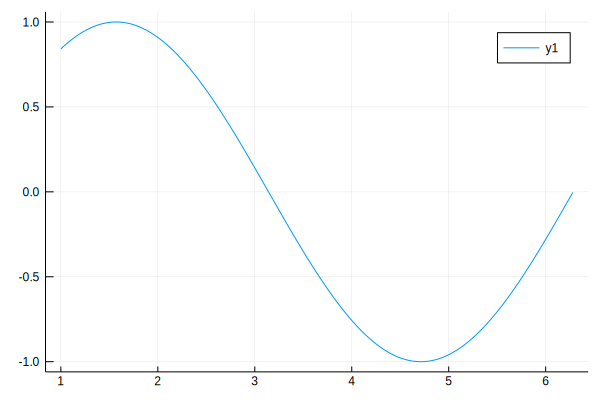

In [2]:
x = 1:0.01:2pi
y = sin.(x)

plot(x, y)

Por supuesto, podemos pintar varias líneas

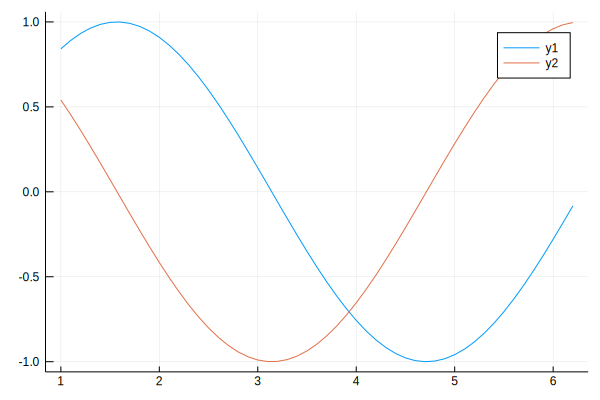

In [3]:
x = 1:0.1:2pi

y1 = sin.(x)
y2 = cos.(x)

plot(x, y1)
plot!(x, y2)

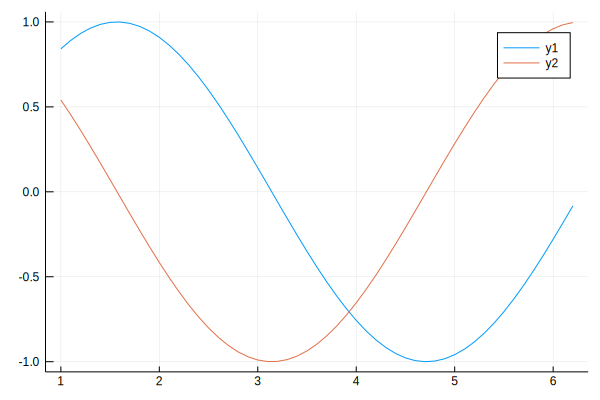

In [4]:
# también especificando el plot
p = plot(x, y1)
plot!(p, x, y2)

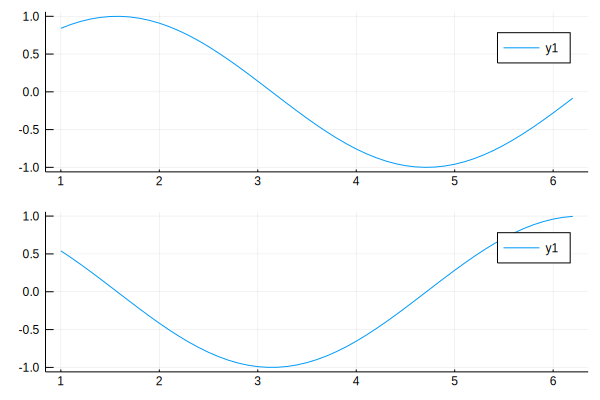

In [5]:
# Y construir un subplot es sencillo
p1 = plot(x, y1)
p2 = plot(x, y2)

plot(p1, p2, layout=(2, 1))

### Personalización 

Casi todo lo relativo a la personalización en `Plots` se hace mediante atributos de la función plot:

http://docs.juliaplots.org/latest/attributes/#attributes-1

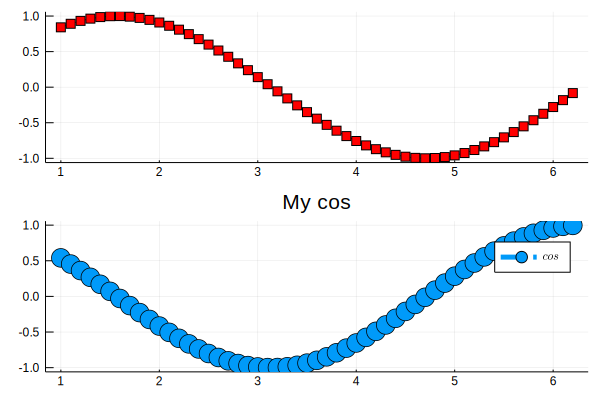

In [6]:
p1 = plot(x, y1, color=:red, label="sin", marker=:square, legend=false)
p2 = plot(x, y2, ls=:dash, lw=5, label="\$cos\$", marker=:circle, markersize=10, title="My cos")

plot(p1, p2, layout=(2, 1))

Se pueden conseguir otras disposiciones más complicadas siguiendo la documentación en: 

http://docs.juliaplots.org/latest/layouts/

### Otros plots 

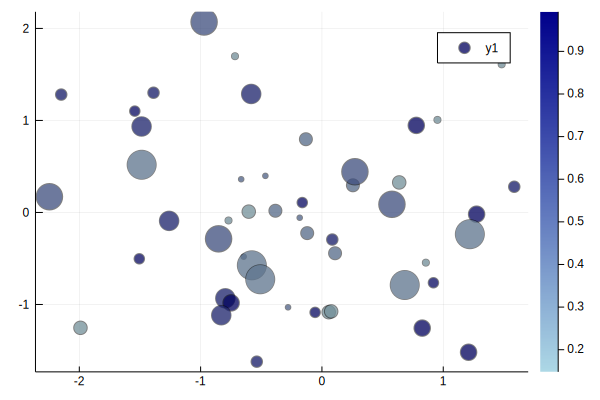

In [7]:
scatter(randn(50), randn(50), zcolor=rand(10), marker=(rand(10).+0.1) .* 20, markeralpha=0.5, c=ColorGradient(:blues))

Para cambiar los colormaps, puedes consultar:

http://docs.juliaplots.org/latest/colors/

In [8]:
# Librerias de colores
clibraries()

5-element Array{Symbol,1}:
 :Plots      
 :cmocean    
 :misc       
 :colorcet   
 :colorbrewer

In [9]:
# Gradientes de colores
cgradients(:colorbrewer)

27-element Array{Symbol,1}:
 :Oranges 
 :PiYG    
 :YlGn    
 :Spectral
 :RdBu    
 :PRGn    
 :Purples 
 :Greys   
 :GnBu    
 :RdYlBu  
 :RdPu    
 :RdYlGn  
 :BuGn    
 ⋮        
 :BrBG    
 :YlOrBr  
 :RdGy    
 :Reds    
 :PuBu    
 :Blues   
 :BuPu    
 :OrRd    
 :PuRd    
 :YlGnBu  
 :YlOrRd  
 :Greens  

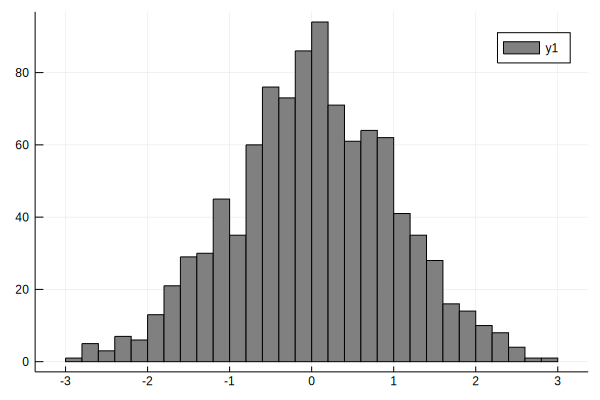

In [10]:
# histograma
histogram(randn(1000), bins=50, c=:gray)

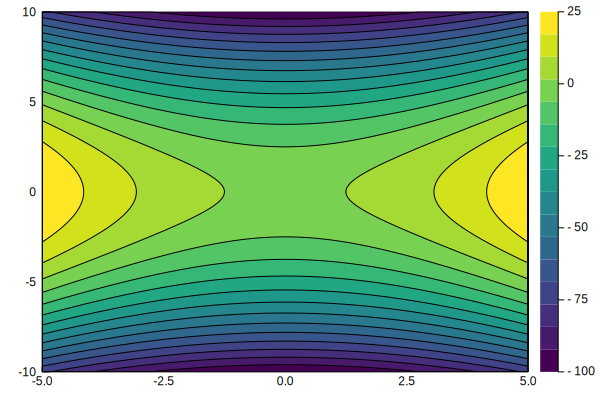

In [11]:
# contour
x = -5:0.1:5
y = -10:0.1:10
fun(x, y) = x^2 - y^2

contourf(x, y, fun, color=ColorGradient(:viridis))

### Otros backends 

Como mencionábamos al principio, `Plots` tiene varios backends. Podemos coprobar cuál estamos usando:

In [12]:
backend()

Plots.GRBackend()

Puedes encontrar más información sobre GR en (https://gr-framework.org/)

Cada backend tine sus fortalezas y debilidades, la ventaja consiste en poder utilizarlos todos desde una sola interfaz

![backends](images/plots_backends.png)

In [13]:
backend(:pyplot)

Plots.PyPlotBackend()

In [14]:
Pkg.add("PyPlot")

UndefVarError: UndefVarError: Pkg not defined

Necesitarás además tener instalado matplotlib

In [15]:
backend(:pyplot)

Plots.PyPlotBackend()

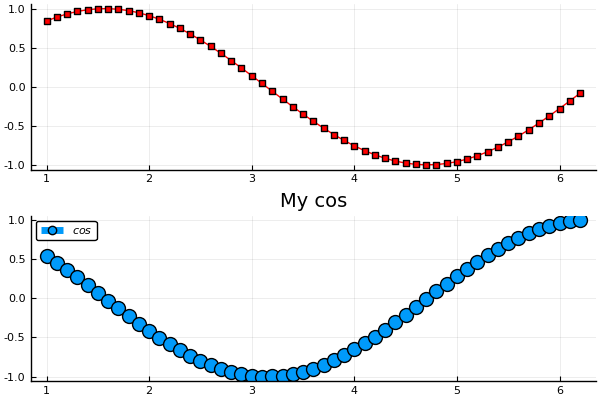

In [23]:
x = 1:0.1:2pi

y1 = sin.(x)
y2 = cos.(x)

p1 = plot(x, y1, color=:red, label="sin", marker=:square, legend=false)
p2 = plot(x, y2, ls=:dash, lw=5, label="\$cos\$", marker=:circle, markersize=10, title="My cos")

plot(p1, p2, layout=(2, 1))

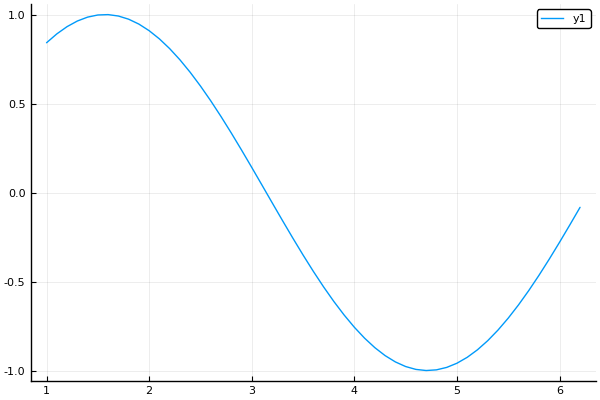

In [24]:
plot(x, y1)

y si no queremos usarlo a través de la interfaz de Plots, podemos usarlo directamente (como si estuviésemos en Python)

In [25]:
# si importamos así directamente PyPlot, algunos de sus métodos colisionarán con los de Plots
using PyPlot

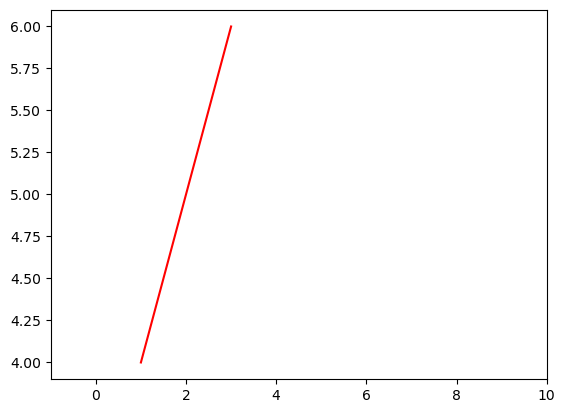

(-1, 10)

In [26]:
f, ax = subplots()

ax.plot([1 2 3]', [4 5 6]', color="r");
ax.set_xlim(-1, 10)

https://github.com/JuliaPy/PyPlot.jl

## DataFrames

In [1]:
using Pkg

In [13]:
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("StatsPlots")

 Resolving package versions...
  Updating `~/julia/201907-UAH-julia-intro/Project.toml`
 [no changes]
  Updating `~/julia/201907-UAH-julia-intro/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/julia/201907-UAH-julia-intro/Project.toml`
 [no changes]
  Updating `~/julia/201907-UAH-julia-intro/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/julia/201907-UAH-julia-intro/Project.toml`
 [no changes]
  Updating `~/julia/201907-UAH-julia-intro/Manifest.toml`
 [no changes]


In [16]:
using CSV
using DataFrames
using Dates

https://juliadata.github.io/CSV.jl/stable/#CSV.jl-Documentation-1

In [112]:
df = CSV.read("data/model.txt", types=Dict(:YYYYMMDD => String, :HHMM=> String), datarow=5, header=4, delim=" ", ignorerepeated=true, dateformat="yyyymmdd")

,YYYYMMDD,HHMM,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
,String,String,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,19840101,0000,20.8,243,7.3,1.25,1002.8,0.04,86.3
2,19840101,0100,20.8,243,7.3,1.25,1002.2,0.04,86.9
3,19840101,0200,20.6,243,7.4,1.24,1001.8,0.04,87.0
4,19840101,0300,20.4,244,7.5,1.24,1001.5,0.05,86.2
5,19840101,0400,20.3,245,7.5,1.24,1001.2,0.05,85.6
6,19840101,0500,20.4,245,7.6,1.24,1000.9,0.06,85.2
7,19840101,0600,20.8,246,7.7,1.24,1000.5,0.07,84.7
8,19840101,0700,20.8,246,7.8,1.24,1000.3,0.08,84.1
9,19840101,0800,20.5,244,7.9,1.24,1000.3,0.09,83.9


In [113]:
DateTime("20190505 0400", "yyyymmdd HHMM")

2019-05-05T04:00:00

In [114]:
DateTime.(df[:YYYYMMDD] .* " " .* df[:HHMM], "yyyymmdd HHMM")

277800-element Array{DateTime,1}:
 1984-01-01T00:00:00
 1984-01-01T01:00:00
 1984-01-01T02:00:00
 1984-01-01T03:00:00
 1984-01-01T04:00:00
 1984-01-01T05:00:00
 1984-01-01T06:00:00
 1984-01-01T07:00:00
 1984-01-01T08:00:00
 1984-01-01T09:00:00
 1984-01-01T10:00:00
 1984-01-01T11:00:00
 1984-01-01T12:00:00
 ⋮                  
 2015-09-10T12:00:00
 2015-09-10T13:00:00
 2015-09-10T14:00:00
 2015-09-10T15:00:00
 2015-09-10T16:00:00
 2015-09-10T17:00:00
 2015-09-10T18:00:00
 2015-09-10T19:00:00
 2015-09-10T20:00:00
 2015-09-10T21:00:00
 2015-09-10T22:00:00
 2015-09-10T23:00:00

In [115]:
df[Symbol("dt")] = DateTime.(df[:YYYYMMDD] .* " " .* df[:HHMM], "yyyymmdd HHMM")

277800-element Array{DateTime,1}:
 1984-01-01T00:00:00
 1984-01-01T01:00:00
 1984-01-01T02:00:00
 1984-01-01T03:00:00
 1984-01-01T04:00:00
 1984-01-01T05:00:00
 1984-01-01T06:00:00
 1984-01-01T07:00:00
 1984-01-01T08:00:00
 1984-01-01T09:00:00
 1984-01-01T10:00:00
 1984-01-01T11:00:00
 1984-01-01T12:00:00
 ⋮                  
 2015-09-10T12:00:00
 2015-09-10T13:00:00
 2015-09-10T14:00:00
 2015-09-10T15:00:00
 2015-09-10T16:00:00
 2015-09-10T17:00:00
 2015-09-10T18:00:00
 2015-09-10T19:00:00
 2015-09-10T20:00:00
 2015-09-10T21:00:00
 2015-09-10T22:00:00
 2015-09-10T23:00:00

In [131]:
deletecols(df, [:YYYYMMDD, :HHMM])

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%),dt
,Float64,Int64,Float64,Float64,Float64,Float64,Float64,DateTime
1,20.8,243,7.3,1.25,1002.8,0.04,86.3,1984-01-01T00:00:00
2,20.8,243,7.3,1.25,1002.2,0.04,86.9,1984-01-01T01:00:00
3,20.6,243,7.4,1.24,1001.8,0.04,87.0,1984-01-01T02:00:00
4,20.4,244,7.5,1.24,1001.5,0.05,86.2,1984-01-01T03:00:00
5,20.3,245,7.5,1.24,1001.2,0.05,85.6,1984-01-01T04:00:00
6,20.4,245,7.6,1.24,1000.9,0.06,85.2,1984-01-01T05:00:00
7,20.8,246,7.7,1.24,1000.5,0.07,84.7,1984-01-01T06:00:00
8,20.8,246,7.8,1.24,1000.3,0.08,84.1,1984-01-01T07:00:00
9,20.5,244,7.9,1.24,1000.3,0.09,83.9,1984-01-01T08:00:00


In [132]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Union…,Any,Union…,Any,Union…,Nothing
1,YYYYMMDD,,19840101,,20150910,11575,
2,HHMM,,0000,,2300,24,
3,M(m/s),9.68776,0.0,9.5,32.4,,
4,D(deg),193.255,0,212.0,360,,
5,T(C),10.1415,-7.8,10.0,30.8,,
6,De(k/m3),1.23448,1.15,1.23,1.33,,
7,PRE(hPa),1003.03,942.0,1003.7,1032.4,,
8,RiNumber,-25.6524,-9.6312e5,0.0,93738.3,,
9,RH(%),81.6342,26.4,83.0,100.0,,


In [144]:
sort(df, Symbol("M(m/s)"), rev=true)

,YYYYMMDD,HHMM,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
,String,String,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,20021027,1300,32.4,257,11.3,1.2,982.6,-0.07,69.5
2,20001030,0800,32.2,202,12.8,1.18,966.7,-0.02,82.6
3,20021027,1200,32.0,253,11.7,1.2,980.1,-0.06,70.8
4,20001030,0900,31.7,209,12.4,1.18,966.5,-0.03,81.0
5,20001030,0700,31.6,196,13.2,1.18,967.5,-0.0,84.3
6,19871016,0600,31.1,202,15.0,1.17,965.0,0.06,79.1
7,19871016,0700,31.1,207,14.8,1.17,967.2,0.05,76.0
8,20021027,1400,30.9,262,11.0,1.21,985.5,-0.08,69.7
9,20001030,1000,30.5,216,11.9,1.18,966.4,-0.06,79.6


In [137]:
gby = groupby(df, :month)

,YYYYMMDD,HHMM,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
,String,String,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,19840101,0000,20.8,243,7.3,1.25,1002.8,0.04,86.3
2,19840101,0100,20.8,243,7.3,1.25,1002.2,0.04,86.9
3,19840101,0200,20.6,243,7.4,1.24,1001.8,0.04,87.0
4,19840101,0300,20.4,244,7.5,1.24,1001.5,0.05,86.2
5,19840101,0400,20.3,245,7.5,1.24,1001.2,0.05,85.6
6,19840101,0500,20.4,245,7.6,1.24,1000.9,0.06,85.2
7,19840101,0600,20.8,246,7.7,1.24,1000.5,0.07,84.7
8,19840101,0700,20.8,246,7.8,1.24,1000.3,0.08,84.1
9,19840101,0800,20.5,244,7.9,1.24,1000.3,0.09,83.9


In [139]:
groupindices(gby)

277800-element Array{Union{Missing, Int64},1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 9
 9
 9
 9
 9
 9
 9
 9
 9
 9
 9
 9

---

In [1]:
using PyCall
display_ = pyimport("IPython.core.display")
css_file = "./style/style.css"
display_.HTML(pybuiltin("open")(css_file).read())

PyObject <IPython.core.display.HTML object>

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base.GenericIOBuffer{Array{UInt8,1}}}, ::MIME{Symbol("text/html")}, ::PyObject) at PyCall.jl:895
└ @ PyCall /home/asaez/.julia/packages/PyCall/ttONZ/src/PyCall.jl:895
